In [58]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from classifier_fit import train_test_clf
# pd.set_option('display.max_colwidth', None)
print("\n\n 库已加载！")



 库已加载！


In [59]:
with open(r"D:\GraduationDesign\sms-spam-detector\data\spam_dic.pkl", "rb") as f:
    spam_vecs = pickle.load(f)

In [60]:
print(len(spam_vecs['BERT']))  #4869

4869


## 加载预处理数据

In [61]:
print(spam_vecs.keys())

dict_keys(['BoW', 'TFIDF', 'BERT'])


In [62]:
with open(r"D:\GraduationDesign\sms-spam-detector\data\spam_label.pkl", "rb") as f:
    spam_labels = pickle.load(f)

In [63]:
print(spam_labels)

0       0
1       0
2       0
3       1
4       1
       ..
4864    0
4865    0
4866    0
4867    0
4868    0
Name: label, Length: 4869, dtype: int64


## 切分数据集

In [64]:
X_train, X_test, y_train, y_test = train_test_split(spam_vecs['BERT'], spam_labels, test_size=0.2, shuffle=True,
                                                    random_state=1)  # random_state=0每次分割得到不同的数组，1每次得到相同的数组
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, shuffle=True,
#                                                     random_state=1)  # random_state=0每次分割得到不同的数组，1每次得到相同的数组

In [27]:
# countVec = CountVectorizer(
#     analyzer='word',
#     strip_accents='ascii',
#     tokenizer=Tokenizer.tokenize_stem,
#     lowercase=True,
#     stop_words=Tokenizer.english_stopwords,
#     max_features=512,  # We set the same dim as BERT
# )
# pipe = Pipeline([('countVec', countVec), ('svc', SVC())])

In [28]:
# pipe.fit(X_train, y_train)

In [29]:
# y_pre = pipe.predict(X_test)

In [30]:
# pipe.score(X_test, y_test)

In [26]:
# print(len(X_test)/len(X_train))
# print(len(X_val)/len(X_train))

In [31]:
# print(type(X_test))

In [32]:
# print(pipe.predict(["2 and half years i missed your friendship:-)"]))

### SVC参数解释:(基于 LIBSVM)
- C: 目标函数的惩罚系数C，用来平衡分类间隔margin和错分样本的，default C = 1.0；选择的越大，表示对错误例惩罚程度越大，可能会导致模型过拟合
- kernel：参数选择有RBF, Linear, Poly, Sigmoid, 默认的是"RBF"
- degree：if you choose 'Poly' in param 2, this is effective, degree决定了多项式的最高次幂
- gamma：核函数的系数('Poly', 'RBF' and 'Sigmoid'), 默认是gamma = 1 / n_features
- random_state ：用于概率估计的数据重排时的伪随机数生成器的种子
- max_iter: 最大迭代次数，default = 1， if max_iter = -1, no limited
- tol（default = 1e - 3）: svm结束标准的精度
- coef0：核函数中的独立项，'RBF' and 'Poly'有效
**调整C,kernel,gamma**

### LinearSVC参数解释：(基于 LIBLINEAR)
- penalty: 指定惩罚中使用的规范
- loss: 指定损失函数
- dual: 选择算法以解决双优化或原始优化问题
- tol: 公差停止标准
- C: 错误项的惩罚参数
**调整C**

### LogisticRegression参数解释：
- penalty: 正则化选择参数，参数可选值为l1和l2，分别对应l1正则化和l2正则化，**默认是l2**正则化。一般l2就够用了
- dual:用来指明是否将原问题改成他的对偶问题，对偶问题可以理解成相反问题，比如原问题是求解最大值的线性规划，那么他的对偶问题就是转化为求解最小值的线性规划，适用于样本较小的数据集，因样本小时，计算复杂度较低。
- tol:残差收敛条件，默认是0.0001，也就是只需要收敛的时候两步只差＜0.0001就停止，可以设置更大或更小。(逻辑回归模型的损失函数是残差平方和)
- C:正则化系数，正则化强度的导数，必须是一个正数，值越小，正则化强度越大，即防止过拟合的程度更大。
- fit_intercept:是否将截距/方差加入到决策模型中，默认为True
- class_weight:class_weight是很重要的一个参数，是用来调节正负样本比例的，默认是值为None，也就是正负样本的权重是一样的，你可以以dict的形式给模型传入任意你认为合适的权重比，也可以直接指定一个值“balanced”，模型会根据正负样本的绝对数量比来设定模型最后结果的权重比
    比如，有一数据集的正负样本绝对数量比为4:6,如果你给参数class_weight赋予balanced值，那么最后模型结果中，正负样本的权重比就会变成6:4。
- random_state:随机种子的设置，默认是None,如果设置了随机种子，那么每次使用的训练集和测试集都是一样的，这样不管你运行多少次，最后的准确率都是一样的；如果没有设置，那么每次都是不同的训练集和测试集，最后得出的准确率也是不一样的。
- solver:用来指明损失函数的优化方法，默认是‘lbfgs’方法,**liblinear**适合小数据集
**调整C,class_weight，solver**

### GaussianNB参数解释：
- 无参数不需要调参

### SGDClassifier参数解释：
- loss: 损失函数的类型。默认值为’hinge’
    - ‘hinge’：合页损失函数，表示线性SVM模型
    - ‘log’：对数损失函数，表示逻辑回归模型
    - ‘modified_huber’：’hing’和’log’损失函数的结合，表现两者的优点
    - ‘squared_hinge’：平方合页损失函数，表示线性SVM模型
    - ‘perceptron’：感知机损失函数
- penalty: 罚项类型,默认l2
- alpha: 罚项前的系数，默认值为0.0001
- tol: 浮点数或0.0001，可选的。训练结束的误差边界
- learning_rate：字符串，可选的。学习速率的策略
- class_weight: 类别的权重
**调整参数loss,alpha,class_weight**

### KNeighborsClassifier参数解释：
- n_neighbors：选取几个邻居
- weights：邻居的权重：平均 / 越重话语权越大
    - 'uniform'，表示不考虑距离权重这个超参数；统一的权重。每个邻域中的所有点的权重相等
    - 'distance'，表示考虑距离权重这个超参数；权重点的距离的倒数。在这种情况下，查询点的较近的邻居将比较远的邻居具有更大的影响。
- algorithm：
    - 'ball_tree' will use BallTree
    - 'kd_tree' will use KDTree
    - 'brute' will use a brute-force search.
    - 'auto' 默认选项，是看哪个好用那个
- leaf_size：只有ball_tree和kd_tree才有必要
- p与metric：距离表示，p=1是manhattan_distance，p=2是euclidean_distance
    - 当kNN算法考虑距离权重超参数（weights='distance'）时，才会考虑是否输入距离参数（P）
**调整n_neighbors,weights,p**

### MLPClassifier参数解释：
- hidden_layer_sizes: 指定隐层，隐单元。MLP默认使用100个隐结点。[10]包含10个隐单元，[10,10]包含两个隐层，每个隐层包含10个隐单元。隐藏层节点数与层数也是紧密配合使用，能充分调节神经网络的效果。
- activation: 指定使用的激活函数，默认的非线性是relu。”identity”、“logistic”、“tanh”以及“relu”
- solver: 求解器,{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
    - 'lbfgs' 是准牛顿方法家族中的优化器。
    - 'sgd' 指的是随机梯度下降。
    - “adam”指的是由 Kingma、Diederik 和 Jimmy Ba 提出的基于随机梯度的优化器
    - 注意：就训练时间和验证分数而言，默认求解器“adam”在相对较大的数据集（具有数千个训练样本或更多）上运行良好。然而，对于小型数据集，“lbfgs”可以更快地收敛并表现更好。
- alpha: 惩罚参数，调整l2。**模型复杂度控制**，控制正则化的程度，默认的数值是0.0001
- max_iter: 可以指定迭代次数，增加迭代次数可以提高训练集的性能，但是没有提高泛化性能
**调整参数hidden_layer_sizes,solver,max_iter,alpha**

### 定义分类器

In [137]:
classifiers = [
    GaussianNB(),  # 无参数不需要调参
    SVC(),
    LinearSVC(),
    LogisticRegression(),
    SGDClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
]

In [138]:
tune_params = [
    [  # GaussianNB
        {},
    ],
    [  # SVC
        {"kernel": ["linear", "rbf"], "gamma": ["scale", 0.0001, 0.001, 0.01, 0.1], "C": np.logspace(0, 4, num=5)}
    ],
    [  # LinearSVC
        {"C": np.logspace(0, 4, num=5)}
    ],
    [  # LogisticRegression
        {"C": np.logspace(0, 4, num=5), "class_weight": [None, "balanced"]}
    ],
    [  # SGDClassifier
        {"loss": ["hinge", "squared_hinge"], "alpha": np.logspace(0, 4, 5, base=0.1),
         "class_weight": [None, "balanced"]}
    ],
    [  # KNeighborsClassifier
        {"n_neighbors": np.arange(1, 20), "weights": ['uniform']},  # 20组
        {"n_neighbors": np.arange(1, 20), "weights": ['distance'], "p": np.arange(1, 5)}  #20*1*4=80组
    ],
    [  # MLPClassifier
        {"hidden_layer_sizes": [(10,), (10, 10), (100,), (100, 30)], "solver": ["adam", "sgd", "lbfgs"],
         "max_iter": [50, 100, 200, 1000], "alpha": np.logspace(0, 4, 5, base=0.1)},
    ],
]

In [139]:
from typing import Any, List, Dict
from dataclasses import dataclass

@dataclass
class Classifier:
    model: Any
    tune_params: List[Dict]

clfs_tune_params = []
for i in range(len(classifiers)):
    clfs_tune_params.append(Classifier(classifiers[i], tune_params[i]))

### 设置分类器的超参数组合

使用网格搜索交叉验证寻找最优参数

In [140]:
gs_results = pd.DataFrame(columns=['Classifier', 'GridSearchCV', 'Best params', 'Best estimator'])

In [141]:
print(gs_results.head())

Empty DataFrame
Columns: [Classifier, GridSearchCV, Best params, Best estimator]
Index: []


In [142]:
def clf_fit(clf):
    print("Classifier: %s" % type(clf).__name__)
    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    print("Acc: %s" % accuracy_score(y_test, y_pred))
    print("BAcc: %s" % balanced_accuracy_score(y_test, y_pred))
    # print(precision_recall_fscore_support(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [143]:
# GridSearchCV使用交叉验证进行网格搜索，其中，n_jobs=-1代表使用计算机的全部CPU
for clf in clfs_tune_params:
    # clf.model.fit()
    # clf_fit(classifiers[i])
    gs = GridSearchCV(clf.model, clf.tune_params, verbose=2, cv=5, n_jobs=-1, scoring="balanced_accuracy")
    print("\n\n------------ 网格搜索 %s 最佳参数中------------" % type(clf.model).__name__)
    gs.fit(X_train, y_train)
    # 通过交叉验证获取最好的超参数和模型评估最好的分数
    gs_results = gs_results.append(
        {'Classifier': type(clf.model).__name__, 'GridSearchCV': gs, 'Best params': gs.best_params_,
         'Best estimator': gs.best_estimator_}, ignore_index=True)
    print(gs.best_params_)
    print(gs.best_score_)




------------ 网格搜索 GaussianNB 最佳参数中------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
0.9520722464118692


------------ 网格搜索 SVC 最佳参数中------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.9679680696661828


------------ 网格搜索 LinearSVC 最佳参数中------------
Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'C': 10.0}
0.970335429769392


------------ 网格搜索 LogisticRegression 最佳参数中------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'C': 10.0, 'class_weight': 'balanced'}
0.973618771165941


------------ 网格搜索 SGDClassifier 最佳参数中------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'alpha': 0.0010000000000000002, 'class_weight': 'balanced', 'loss': 'hinge'}
0.97129656507015


------------ 网格搜索 KNeighborsClassifier 最佳参数中------------
Fitting 5 folds for each of 95 candidates, totalling 475 fits
{'n_neighbors': 5, 'p': 4, 'weights': 'distance'}
0.9619271

In [144]:
gs_results

,Classifier,GridSearchCV,Best params,Best estimator
0,GaussianNB,"GridSearchCV(cv=5, estimator=GaussianNB(), n_j...",{},GaussianNB()
1,SVC,"GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,...","{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}","SVC(C=100.0, gamma=0.1)"
2,LinearSVC,"GridSearchCV(cv=5, estimator=LinearSVC(), n_jo...",{'C': 10.0},LinearSVC(C=10.0)
3,LogisticRegression,"GridSearchCV(cv=5, estimator=LogisticRegressio...","{'C': 10.0, 'class_weight': 'balanced'}","LogisticRegression(C=10.0, class_weight='balan..."
4,SGDClassifier,"GridSearchCV(cv=5, estimator=SGDClassifier(), ...","{'alpha': 0.0010000000000000002, 'class_weight...","SGDClassifier(alpha=0.0010000000000000002, cla..."
5,KNeighborsClassifier,"GridSearchCV(cv=5, estimator=KNeighborsClassif...","{'n_neighbors': 5, 'p': 4, 'weights': 'distance'}","KNeighborsClassifier(p=4, weights='distance')"
6,MLPClassifier,"GridSearchCV(cv=5, estimator=MLPClassifier(), ...","{'alpha': 0.00010000000000000002, 'hidden_laye...","MLPClassifier(alpha=0.00010000000000000002, hi..."


In [145]:
# 保存网格搜索结果
with open('D:\GraduationDesign\sms-spam-detector\data\gs_results.pkl', "wb") as f:
    pickle.dump(gs_results, f)

In [146]:
# 加载结果
gs_results_reload = pickle.load(open(r'D:\GraduationDesign\sms-spam-detector\data\gs_results.pkl', "rb"))

In [147]:
print(gs_results_reload.shape)

(7, 4)


In [148]:
for gs_r in gs_results['GridSearchCV']:
    # gs_r = row['GridSearchCV']
    for mean, std, params in zip(gs_r.cv_results_["mean_test_score"], gs_r.cv_results_["std_test_score"],
                                 gs_r.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        print()

0.952 (+/-0.032) for {}

0.958 (+/-0.027) for {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}

0.953 (+/-0.030) for {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}

0.958 (+/-0.027) for {'C': 1.0, 'gamma': 0.0001, 'kernel': 'linear'}

0.500 (+/-0.000) for {'C': 1.0, 'gamma': 0.0001, 'kernel': 'rbf'}

0.958 (+/-0.027) for {'C': 1.0, 'gamma': 0.001, 'kernel': 'linear'}

0.500 (+/-0.000) for {'C': 1.0, 'gamma': 0.001, 'kernel': 'rbf'}

0.958 (+/-0.027) for {'C': 1.0, 'gamma': 0.01, 'kernel': 'linear'}

0.521 (+/-0.015) for {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}

0.958 (+/-0.027) for {'C': 1.0, 'gamma': 0.1, 'kernel': 'linear'}

0.940 (+/-0.028) for {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

0.967 (+/-0.017) for {'C': 10.0, 'gamma': 'scale', 'kernel': 'linear'}

0.961 (+/-0.026) for {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}

0.967 (+/-0.017) for {'C': 10.0, 'gamma': 0.0001, 'kernel': 'linear'}

0.500 (+/-0.000) for {'C': 10.0, 'gamma': 0.0001, 'kernel': 'rbf'}

0.967 (+/-0.017) for

In [154]:
best_classifier = []
for search in gs_results['GridSearchCV']:
    # print(search.best_estimator_)
    best_classifier.append(search.best_estimator_)

[BERT GaussianNB]                    Balanced accuracy: 97.60%
[BERT SVC]                           Balanced accuracy: 97.82%


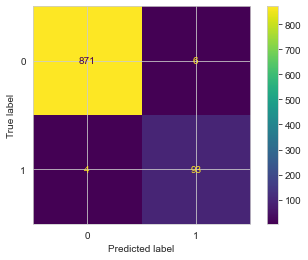

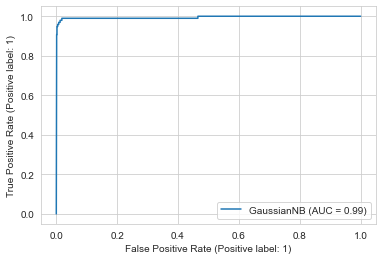

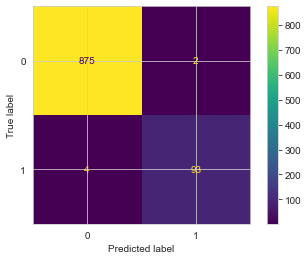

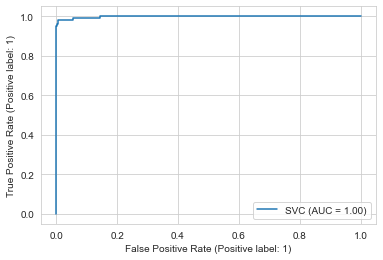

In [157]:
for clf in best_classifier[:2]:
    train_test_clf(clf, X_train, y_train, X_test, y_test, "[%s %s] " % ('BERT', type(clf).__name__), isShow=True)

1. clf_with_encoder.ipynb ->acc, bacc, f1, prec, recall(default clf with all encoders)-> BERT在各缺省参数下的分类器均表现优异->clf_result.pkl
2. 数据用BERT的->调整参数, 获取最优参数下的分类器-> 保存gs.best_estimator_->使用BERT的数据进行重新拟合,**画图**->acc, bacc, f1, prec, recall(best params clf with bert encoders)->
3. Pipeline(bert, clf).fit->七个使用bert